In [1]:
import pandas as pd

from sklearn.utils import resample
# import category_encoders as ce
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('/home/phattrada-mik/flyte/flyte/workflows/data/loan_data.csv')
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [4]:
data.nunique()

person_age                           60
person_gender                         2
person_education                      5
person_income                     33989
person_emp_exp                       63
person_home_ownership                 4
loan_amnt                          4483
loan_intent                           6
loan_int_rate                      1302
loan_percent_income                  64
cb_person_cred_hist_length           29
credit_score                        340
previous_loan_defaults_on_file        2
loan_status                           2
dtype: int64

In [5]:
print(f"Maximum of person_age {data['person_age'].max()} , Minimum of person_age {data['person_age'].min()}")

Maximum of person_age 144.0 , Minimum of person_age 20.0


In [6]:
data.groupby(by='person_age').count().sort_values(by='person_gender',ascending=False)

,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
person_age,,,,,,,,,,,,,
23.0,5254,5254,5254,5254,5254,5254,5254,5254,5254,5254,5254,5254,5254
24.0,5138,5138,5138,5138,5138,5138,5138,5138,5138,5138,5138,5138,5138
25.0,4507,4507,4507,4507,4507,4507,4507,4507,4507,4507,4507,4507,4507
22.0,4236,4236,4236,4236,4236,4236,4236,4236,4236,4236,4236,4236,4236
26.0,3659,3659,3659,3659,3659,3659,3659,3659,3659,3659,3659,3659,3659
27.0,3095,3095,3095,3095,3095,3095,3095,3095,3095,3095,3095,3095,3095
28.0,2728,2728,2728,2728,2728,2728,2728,2728,2728,2728,2728,2728,2728
29.0,2455,2455,2455,2455,2455,2455,2455,2455,2455,2455,2455,2455,2455
30.0,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021


In [7]:
data.groupby(by='person_gender').count()['person_age']

person_gender
female    20159
male      24841
Name: person_age, dtype: int64

In [8]:
data.groupby(by='person_education').count()

,person_age,person_gender,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
person_education,,,,,,,,,,,,,
Associate,12028,12028,12028,12028,12028,12028,12028,12028,12028,12028,12028,12028,12028
Bachelor,13399,13399,13399,13399,13399,13399,13399,13399,13399,13399,13399,13399,13399
Doctorate,621,621,621,621,621,621,621,621,621,621,621,621,621
High School,11972,11972,11972,11972,11972,11972,11972,11972,11972,11972,11972,11972,11972
Master,6980,6980,6980,6980,6980,6980,6980,6980,6980,6980,6980,6980,6980


In [9]:
data.groupby(by='person_emp_exp').count().sort_values(by='person_gender',ascending=False) #employee experience

,person_age,person_gender,person_education,person_income,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
person_emp_exp,,,,,,,,,,,,,
0,9566,9566,9566,9566,9566,9566,9566,9566,9566,9566,9566,9566,9566
2,4134,4134,4134,4134,4134,4134,4134,4134,4134,4134,4134,4134,4134
1,4061,4061,4061,4061,4061,4061,4061,4061,4061,4061,4061,4061,4061
3,3890,3890,3890,3890,3890,3890,3890,3890,3890,3890,3890,3890,3890
4,3524,3524,3524,3524,3524,3524,3524,3524,3524,3524,3524,3524,3524
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,1,1,1,1,1,1,1,1,1,1,1,1,1
101,1,1,1,1,1,1,1,1,1,1,1,1,1
121,1,1,1,1,1,1,1,1,1,1,1,1,1


In [10]:
print(f"Maximum of person_income {data['person_income'].max()} , Minimum of person_income {data['person_income'].min()}")

Maximum of person_income 7200766.0 , Minimum of person_income 8000.0


In [11]:
data['person_income'].min()

8000.0

In [12]:
data['previous_loan_defaults_on_file'].unique()

array(['No', 'Yes'], dtype=object)

In [13]:
data.groupby(by='loan_intent').count()['person_age']

loan_intent
DEBTCONSOLIDATION    7145
EDUCATION            9153
HOMEIMPROVEMENT      4783
MEDICAL              8548
PERSONAL             7552
VENTURE              7819
Name: person_age, dtype: int64

In [14]:
data.groupby(by='person_home_ownership').count()['person_age']

person_home_ownership
MORTGAGE    18489
OTHER         117
OWN          2951
RENT        23443
Name: person_age, dtype: int64

In [15]:
print(f"Maximum of loan_int_rate {data['loan_int_rate'].max()} , Minimum of loan_int_rate {data['loan_int_rate'].min()}")

Maximum of loan_int_rate 20.0 , Minimum of loan_int_rate 5.42


In [16]:
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [17]:
# change person_gender -> female = 0 , male = 1
data['person_gender'] = data['person_gender'].map({'female':0,'male':1})
data['previous_loan_defaults_on_file'] = data['previous_loan_defaults_on_file'].map({'No':0,'Yes':1})
data['person_education'] = data['person_education'].map({'High School':1,
                                                         'Associate':2,
                                                         'Bachelor':3,
                                                         'Master':4,
                                                         'Doctorate':5})
data = pd.get_dummies(data, columns=['person_home_ownership', 'loan_intent'], drop_first=True)
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22.0,0,4,71948.0,0,35000.0,16.02,0.49,3.0,561,0,1,False,False,True,False,False,False,True,False
1,21.0,0,1,12282.0,0,1000.0,11.14,0.08,2.0,504,1,0,False,True,False,True,False,False,False,False
2,25.0,0,1,12438.0,3,5500.0,12.87,0.44,3.0,635,0,1,False,False,False,False,False,True,False,False
3,23.0,0,3,79753.0,0,35000.0,15.23,0.44,2.0,675,0,1,False,False,True,False,False,True,False,False
4,24.0,1,4,66135.0,1,35000.0,14.27,0.53,4.0,586,0,1,False,False,True,False,False,True,False,False


In [18]:
median_age = data['person_age'].median()
median_age

26.0

In [19]:
data['person_age'] = data['person_age'].apply(lambda x: median_age if x > 100 else x)

In [20]:
column = 'person_age'
title = column.replace('_', ' ')

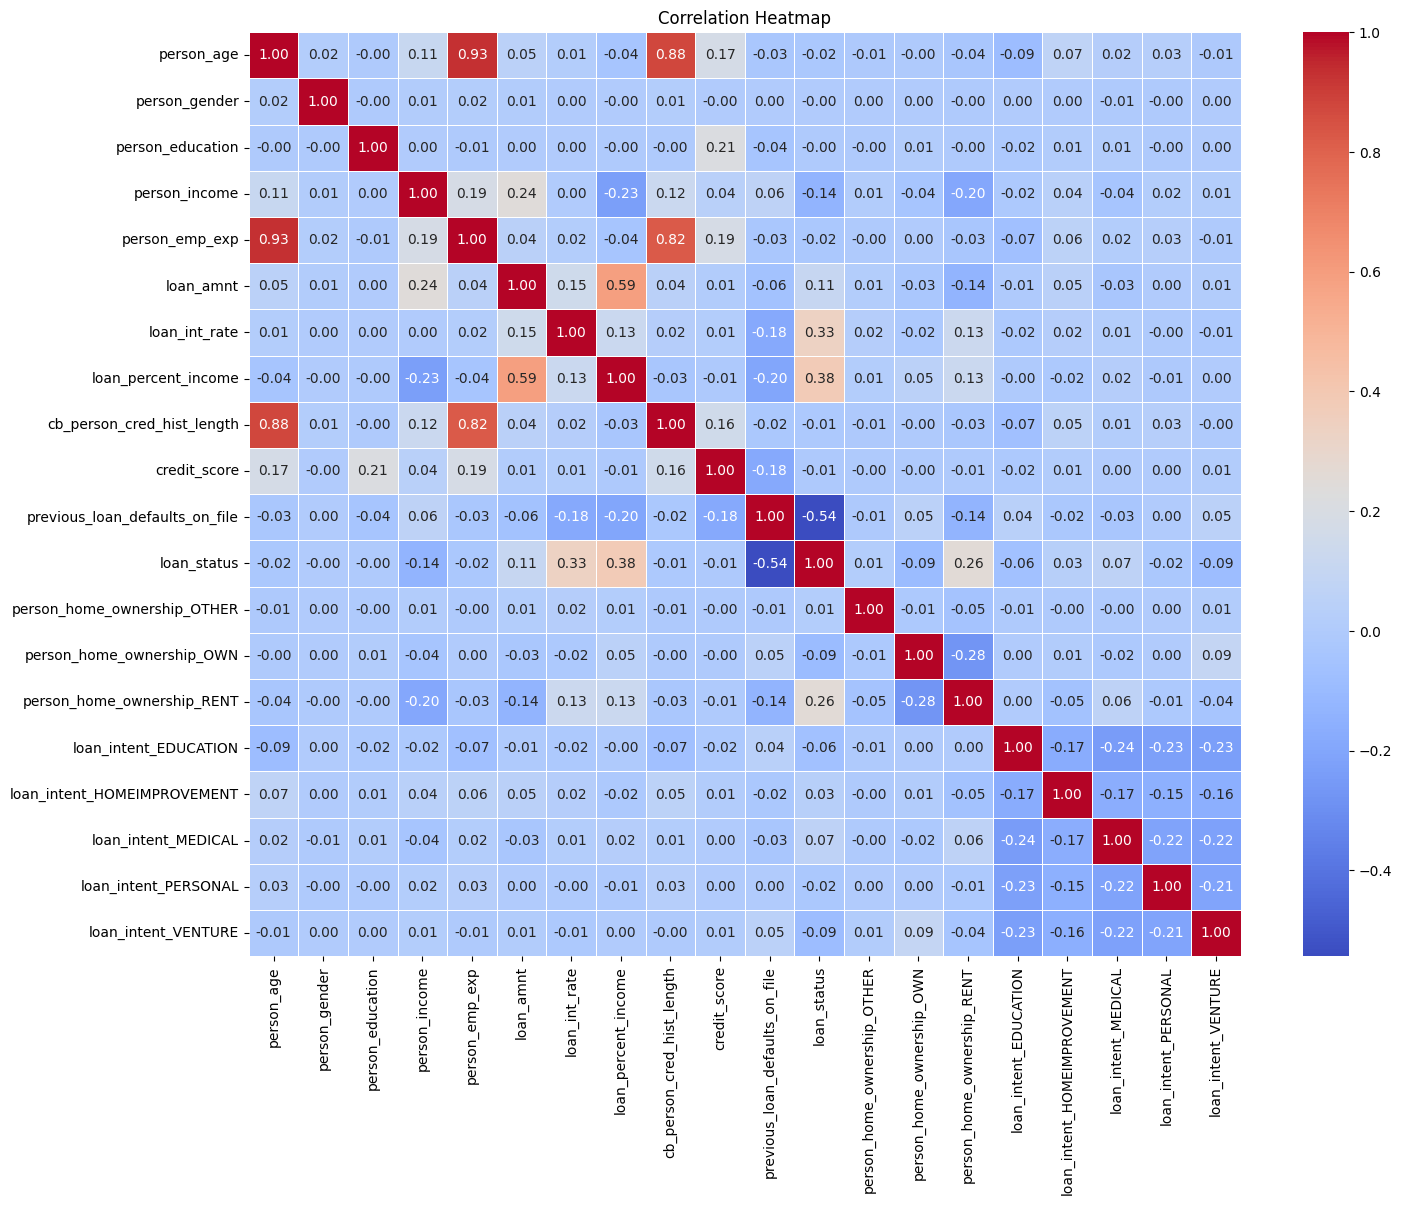

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = data.corr()

# Plotting the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

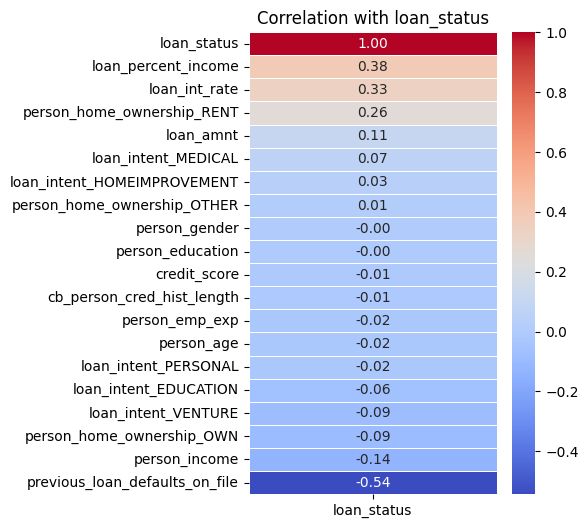

In [22]:
target_variable = 'loan_status'
target_corr = corr_matrix[[target_variable]].sort_values(by=target_variable, ascending=False)

# Plotting the heatmap for correlation values with respect to the target variable
plt.figure(figsize=(4, 6))
sns.heatmap(target_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title(f'Correlation with {target_variable}')
plt.show()

In [23]:
X = data.drop(['loan_status'], axis=1)
y = data['loan_status']

display(X.head())
display(y.head())

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22.0,0,4,71948.0,0,35000.0,16.02,0.49,3.0,561,0,False,False,True,False,False,False,True,False
1,21.0,0,1,12282.0,0,1000.0,11.14,0.08,2.0,504,1,False,True,False,True,False,False,False,False
2,25.0,0,1,12438.0,3,5500.0,12.87,0.44,3.0,635,0,False,False,False,False,False,True,False,False
3,23.0,0,3,79753.0,0,35000.0,15.23,0.44,2.0,675,0,False,False,True,False,False,True,False,False
4,24.0,1,4,66135.0,1,35000.0,14.27,0.53,4.0,586,0,False,False,True,False,False,True,False,False


0    1
1    0
2    1
3    1
4    1
Name: loan_status, dtype: int64

In [24]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
type(X_train)

pandas.core.frame.DataFrame

In [26]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [27]:
type(X_train)

numpy.ndarray

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(verbosity=-1, random_state=42)
}

In [ ]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Predictions on validation set
    y_val_pred = model.predict(X_val)
    
    # Train and Test Scores
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_val, y_val)
    
    # Accuracy Score
    accuracy = accuracy_score(y_val, y_val_pred)
    
    results.append({
        'Model': name,
        'Train Score': train_score,
        'Test Score': test_score,
        'Accuracy Score': accuracy
    })
    
    # Classification report
    print(f"Classification Report for {name}:\n")
    print(classification_report(y_val, y_val_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_val, y_val_pred)
    
    # Plotting confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='PuBu', xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    print("\n" + "="*60 + "\n")

results_df = pd.DataFrame(results)

# Display the model performance table
print("Model Performance Table:")
display(results_df)

In [ ]:
# Identify the best model by accuracy
best_model_row = results_df.loc[results_df['Accuracy Score'].idxmax()]
best_model_name = best_model_row['Model']
best_model_accuracy = best_model_row['Accuracy Score']

print(f"\nBest Model: {best_model_name} with Accuracy: {best_model_accuracy:.4f}")

In [ ]:
# Check if the best model supports feature importances
best_model = models[best_model_name]

if hasattr(best_model, 'feature_importances_'):
    feature_importances = best_model.feature_importances_

    feature_importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
    plt.title(f'Feature Importances - {best_model_name}', fontsize=16)
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()
else:
    print(f"The {best_model_name} model does not support feature importances.")

In [ ]:
type(cm)

In [ ]:
test_probabilities = best_model.predict_proba(X_val)[:, 1]  

# Plot distribution of predicted probabilities
plt.figure(figsize=(10, 6))
sns.histplot(test_probabilities, bins=30, kde=True, color='dodgerblue')
plt.title(f'Distribution of Predicted Loan Approval Probabilities - {best_model_name}')
plt.xlabel('Predicted Probability of Loan Approval')
plt.ylabel('Frequency')
plt.xlim(0, 1) 
plt.grid()
plt.show()

In [ ]:
binary_predictions = (test_probabilities > 0.5).astype(int)

# Plot distribution of binary predictions
plt.figure(figsize=(8, 5))
sns.countplot(x=binary_predictions.flatten(), palette='muted')
plt.title('Distribution of Predicted Loan Status')
plt.xlabel('Loan Status (0: Not Approved, 1: Approved)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Approved', 'Approved'])
plt.grid(axis='y')
plt.show()
